## Εγκαταστάσεις

Ανοίξτε ένα command line και εκτελέστε τις παρακάτω εγκαταστάσεις. Πιθανότατα τη βιβιλιοθήκη της Pytorch θα την έχετε από το προηγούμενο εργαστήριο. 

pip install torch
<br>pip install torchvision
<br>pip install urllib3==1.26.6

## Αυτόματη Διαφόρηση με την Autograd

Η **torch.autograd** αποτελεί τη μηχανή της Pytorch για αυτόματη διαφόρηση (automatic differentiation) η οποία βοηθά για την εκπαίδευση νευρωνικών δικτύων, όπως θα δούμε στη συνέχεια του παρόντος εργαστηρίου. 



Ας δούμε πως η autograd συλλέγει τις παραγώγους. Αρχικά, θα δημιουργήσουμε δύο τανυστές *a* και *b* με *requires_grad=True*. Η τελευταία παράμετρος "πληροφορεί" την  autograd πως κάθε πράξη πάνω στους δύο αυτούς τανυστές θα πρέπει να "παρακολουθείται" (tracked). 

In [1]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Μπορούμε να θέσουμε τη τιμή του ορίσματος *requires_grad=True* κατά τη δημιουργία ενός τανυστή, όπως είδαμε παραπάνω, ή και μετέπειτα χρησιμοποιώντας τη μέθοδο *.requires_grad_(True)*

In [2]:
x = torch.tensor([5., 7.])
x.requires_grad_(True)

tensor([5., 7.], requires_grad=True)

Στη συνέχεια, δημιουργούμε έναν ακόμα τανυστή *Q* από τους *a* kai *b*.


<div>
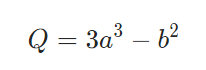
</div>

In [3]:
Q = 3*a**3 - b**2

Ας θεωρήσουμε πως οι τανυστές *a* και *b* αποτελούν παράμετροι ενός νευρωνικού δικτύου και ο *Q* είναι η συνάρτηση που υποδηλώνει το μεταξύ τους σφάλμα (διαφορετικά συνάρτηση κόστους ή σφάλματος - *loss function*). Κατά την εκπαίδευση νευρωνικών δικτύων, θέλουμε να υπολογίσουμε τις παραγώγους της συνάρτησης κόστους του μοντέλου ως προς της παραμέτρους αυτού, δηλαδή:

<div>
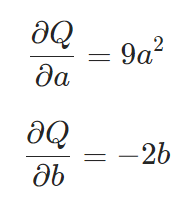
</div>

Όταν καλέσουμε τη συνάρτηση *.backward()* για τον τανυστή *Q*, η autograd υπολογίζει τις παραγώγους ως προς *a* και *b* και τις αποθηκεύει στο *.grad* (π.χ. *a.grad*) attribute των αντίστοιχων τανυστών.

Καλώντας την *Q.backward()*, Θα πρέπει να ορίσουμε άμεσα τη παράμετρο *gradient*. Ο *gradient* είναι ένας τανυστής, οποίος έχει τις ίδιες διαστάσεις με τον *Q*, και αντιπροσωπεύει την παράγωγο του τανυστή *Q* ως προς τον εαυτό του, δηλαδή:

<div>
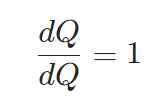
</div>

Ομοίως, μπορούμε επίσης να αθροίσουμε τον τανυστή *Q* σε έναν βαθμωτό και να καλέσουμε την *backward* έμμεσα ως εξής, *Q.sum().backward()*. Στο παρακάτω κώδικα περνάμε το όρισμα τύπου gradient άμεσα:

In [4]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

Έπειτα από τη κλήση της *Q.backward()* οι παράγωγοι θα ανατεθούν στις παραμέτρους *a.grad* και *b.grad* των αντίστοιχων τανυστών.

**Άσκηση 1**

Υπολογίστε τις παραγώγους $\partial Q / \partial a$ και $\partial Q / \partial b$ και ελέγξτε εάν ταυτίζονται με τις παραγώγους που υπολόγισε η *Q.backward()*.

In [5]:
# Ελέγξε εάν οι συλλεγόμενες παράγωγοι είναι σωστές

print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


## Διανυσματικός Λογισμός με την Autograd

Η παρακάτω παράγραφος θα σας βοηθήσει να κατανοήσετε καλύτερα το πως δουλεύει η autograd.

Έστω ότι έχουμε μια συνάρτηση που δέχεται σαν όρισμα ένα διάνυσμα και επιστρέφει ένα διάνυσμα, $\overrightarrow y = f(\overrightarrow x)$, τότε η παράγωγος του $\overrightarrow y$ ως προς το διάνυσμα $\overrightarrow x$ είναι το *Jacobian* μητρώο $J$.

<div>
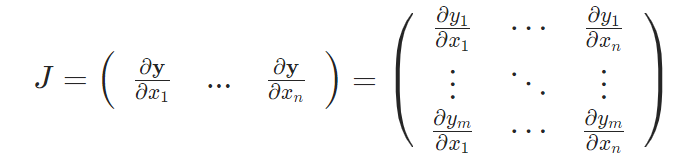
</div>


Η *torch.autograd* αποτελεί μια μηχανή για τον υπολογισμό του γινομένου μεταξύ ενός διανύσματος και του Ιακωβιανού μητρώου (*vector-Jacobian* γινόμενο). Συνεπώς, δοθέντος ενός οποιοδήποτε διανύσματος $\overrightarrow v$, η *torch.autograd* υπολογίζει το γινόμενο $J^Τ * \overrightarrow v $. Αν το $\overrightarrow v$ είναι η παράγωγος της βαθμωτής συνάρτησης $l = g(\overrightarrow y)$:

<div>
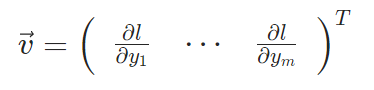
</div>

τότε από το κανόνα της αλυσίδας, το *vector-Jacobian* γινόμενο θα είναι η παράγωγος του $l$ ως προς το διάνυσμα $\overrightarrow x$:

<div>
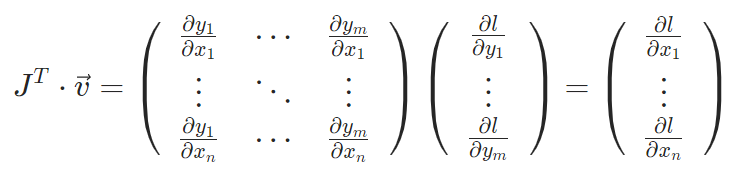
</div>

Συνεπώς, αυτό το χαρακτηριστικό του γινομένου *vector-Jacobian*, το αξιοποιεί η autograd για τον υπολογισμό των gradients μιας βαθμωτής *loss function*. Στο παραπάνω παράδειγμα η παράμετρος *external_grad* αντιπροσωπεύει το διάνυσμα $\overrightarrow v$ 

**Άσκηση 2**

Θέστε τη παράμετρο *gradient* στη συνάρτηση *Q.backward()* ίση με ένα διαφορετικό τανυστή, και υπολογίστε εκ νέου τις παραγώγους $\partial Q / \partial a$ και $\partial Q / \partial b$. Ελέγξτε ξανά εάν ταυτίζονται με τις παραγώγους που υπολόγισε η *Q.backward()*

In [6]:
# Θέστε τη παράμετρο gradient στη συνάρτηση 
#Q.backward() ίση με ένα διαφορετικό τανυστή
Q = 3*a**3 - b**2
external_grad = torch.tensor([2., 2.])
Q.backward(gradient=external_grad)

# Ελέγξε εάν οι συλλεγόμενες παράγωγοι είναι σωστές

print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([False, False])
tensor([False, False])


**Άσκηση 3**

Συμπληρώστε το παρακάτω κώδικα. 
<br> Υπολογίστε τη παράγωγο της συνάρτησης *out* ως προς το τανυστή *inp* 2 συνεχόμενες φορές.
<br> Τι παρατηρείτε;
<br> Στη συνέχεια, υπολογίστε και τη παράγωγο της *out* για $3^η$ φορά, αφότου πρώτα τη θέσετε ίση με το 0 και σχολιάστε πάλι τι παρατηρείτε. 
Μη ξεχάσετε να εκτυπώνετε τις παραγώγους που υπολογίζετε.

**Προσοχή**: Σε κάθε υπολογισμό παραγώγου, θέστε τη παράμετρο *retain_graph=True* της συνάρτησης *.backward()*. Μπορούμε να υπολογίζουμε παραγώγους μόνο μια φορά σε κάθε υπολογιστικό γράφημα (θα δούμε τι είναι το γράφημα - *computational graph* - στη συνέχεια), για λόγους απόδοσης. Αν χρειαστεί να καλέσουμε την *backward* αρκετές φορές στον ίδιο γράφο θα πρέπει να περάσουμε το όρισμα *retain_graph=True* στη κλήση της *backward*. 

In [7]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()

#Συμπληρώστε εδώ τη λύση - υπολογισμός της παραγώγου της 
#συνάρτησης *out* ως προς το τανυστή *inp* 2 συνεχόμενες φορές
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")

#Συμπληρώστε εδώ τη λύση - υπολογισμός της παραγώγου της 
#συνάρτησης *out* ως προς το τανυστή *inp* για 3η φορά
#Tip: Για να θέσετε τη παράγωγο της *out* ίση με 0, προσπελάστε
#τη παράμετρο *inp.grad*, όπου είναι αποθηκευμένη η εν λόγω 
#παράγωγος.
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


**Απάντηση**: Παρατηρείστε πως όταν καλούμε την *backward* τη δεύτερη φορά με το ίδιο όρισμα, η τιμή της παραγώγου είναι διαφορετική. Αυτό συμβαίνει καθώς όταν εκτελείται η *backward propagation*, η PyTorch συσσωρεύει τις παραγώγους, δηλαδή η τιμή των παραγώγων που υπολογίζονται τελευταίες προστίθεται στο *grad* όρισμα (στις παραγώγους) όλων των φύλλων του υπολογιστικού γράφου. Αν επιθυμούμε να υπολογίσουμε απλά τις παραγώγους θα πρέπει πρώτα να μηδενίσουμε το *grad* όρισμα (δηλαδή τις παραγώγους που υπολογίστηκαν στα προηγούμενα βήματα). 

## Νευρωνικά Δίκτυα και Autograd


Τα νευρωνικά δίκτυα (*Neural Networks - NNs*) είναι μια "συλλογή" από εμφωλιασμένες συναρτήσεις οι οποίες εκτελούνται πάνω σε δεδομένα εισόδου. Αυτές οι συναρτήσεις ορίζονται από παραμέτρους (weights και biases), which in PyTorch are stored in tensors.

Η εκπαίδευση ενός NN γίνεται σε 2 βήματα:

*Forward Propagation*: Στην *forward propagation*, το NN προβλέπει όσο καλύτερα γίνεται τη σωστή έξοδο του μοντέλου. Συγκεκριμένα, τρέχει τα δεδομένα εισόδου μέσα από κάθε μία από τις συναρτήσεις του για να κάνει αυτή τη πρόβλεψη.

*Backward Propagation*: Στην *backward propagation*, το NN προσαρμόζει τις παραμέτρους (βάρη κλπ.) του ανάλογα με το σφάλμα της πρόβλεψής του. Αυτό το κάνει διασχίζοντας προς τα πίσω από την έξοδο, συλλέγοντας τις παραγώγους (gradients) του σφάλματος (loss function) ως προς τις παραμέτρους του μοντέλου, και βελτιστοποιώντας τις παραμέτρους αυτές χρησιμοποιώντας τη *gradient descent*. Για περισσότερες λεπτομέρειες για το πως λειτουργεί ο αλγόριθμος του *backward propagation*, μπορείτε να παρακολουθήσετε το παρακάτω [βίντεο](https://www.youtube.com/watch?v=tIeHLnjs5U8).

Όπως είπαμε παραπάνω, οι παράγωγοι αυτοί υπολογίζονται στη PyTorch από τη built-in μηχανή διαφόρησης *torch.autograd*, η οποία υποστηρίζει τον αυτόματο υπολογισμό των παραγώγων για οποιαδήποτε υπολογιστικό γράφημα.

Θεωρήστε το πιο απλό νευρωνικό δίκτυο μιας στιβάδας (layer), με είσοδο *x*, παραμέτρους *w* (weights) και *b* (biases), και μια συνάρτηση κόστους (loss function). Στη PyTorch το μοντέλο αυτό μπορεί να οριστεί ως εξής:

In [8]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

Η *autograd* αποθηκεύει τα δεδομένα (τους τανυστές) και όλες τις εκτελούμενες πράξεις (μαζί με τους συνεπαγώμενους τανυστές) σε ένα κατευθυνόμενο άκυκλο γράφο που ονομάζεται υπολογιστικό γράφημα (computational graph). Ο κώδικας αυτός ορίζει το ακόλουθο υπολογιστικό γράφημα:

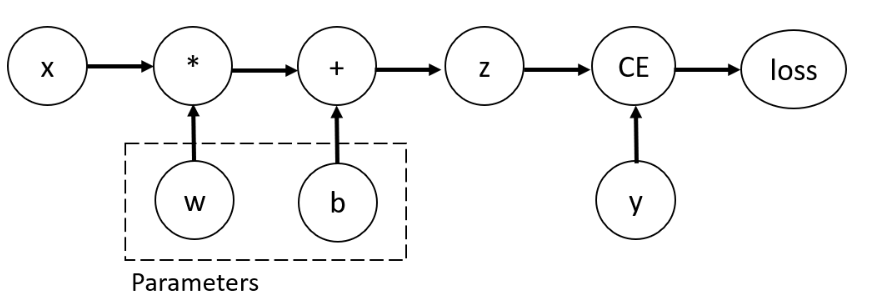

Σε αυτό το δίκτυο οι παράμετροι *w* και *b*, είναι αυτοί που θα πρέπει να βελτιστοποιήσουμε. Συνεπώς, θα πρέπει να μπορούμε να υπολογίσουμε τις παραγώγους της συνάρτησης κόστους ως προς τις μεταβλητές αυτές. Για το λόγο αυτό, θα πρέπει να θέσουμε το όρισμα *requires_grad* ίσο με *True* στους τανυστές αυτούς, όπως είδαμε και παραπάνω.

Ειδικότερα, θέλουμε να υπολογίσουμε τις παραγώγους $\partial loss / \partial w$ και $\partial loss / \partial b$, ενόσω οι τιμές των *x* και *y* είναι σταθερές. 

**Άσκηση 4**

Υπολογίστε και εκτυπώστε τις τιμές των παραγώγων $\partial loss / \partial w$ και $\partial loss / \partial b$.

In [9]:
# Συμπλήρώστε εδώ τη λύση
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0207, 0.1839, 0.3109],
        [0.0207, 0.1839, 0.3109],
        [0.0207, 0.1839, 0.3109],
        [0.0207, 0.1839, 0.3109],
        [0.0207, 0.1839, 0.3109]])
tensor([0.0207, 0.1839, 0.3109])


Παρατηρείστε ότι μπορούμε να καλέσουμε τη συνάρτηση *backward()* χωρίς παραμέτρους. Αυτό είναι ισοδύναμο με το να τη καλέσουμε ως *backward(torch.tensor(1.0))*, το οποίο είναι ένας χρήσιμος τρόπος να υπολογίζουμε gradients στη περίπτωση μιας βαθμωτής συνάρτησης (συνάρτηση που επιστρέφει βαθμωτό), όπως στη περίπτωση του loss κατά την εκπαίδευση ενός νευρωνικού δικτύου.

## Απενεργοποίηση του Gradient Tracking

Όλοι οι τανυστές με όρισμα *requires_grad=True* "παρακολουθούν" (keep track) τους προηγούμενους υπολογισμούς τους και υποστηρίζουν τον υπολογισμό παραγώγων. Παρόλα αυτά, υπάρχουν περιπτώσεις που δε το χρειαζόμαστε αυτό, όπως για παράδειγμα, όταν έχουμε ήδη εκπαιδεύσει το μοντέλο μας και θέλουμε να το τρέξουμε με κάποια δεδομένα εισόδου, δηλαδή θέλουμε να κάνουμε μόνο forward υπολογισμούς μέσω του δικτύου μας. Μπορούμε να σταματήσουμε να "παρακολουθούμε" τους υπολογισμούς ενός τανυστή περικλύωντας τον κώδικά μας με το *torch.no_grad()* block:

In [10]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Άλλος ένας τρόπος για να επιτύχουμε το ίδιο αποτέλεσμα είναι να χρησιμοποιήσουμε τη μέθοδο *detach()* στο τανυστή μας:

In [11]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


Υπάρχουν διάφοροι λόγοι για τους οποίους ενδεχομένως να θέλουμε να απενεργοποιήσουμε το gradient tracking:
* Για να επισημάνουμε ορισμένες παραμέτρους του νευρωνικού μας δίκτυου ως *παγωμένες* (*frozen*) παραμέτρους. Αυτό είναι χρήσιμο σε τεχνικές *transfer learning*.

* Για να επιταχύνουμε τους υπολογισμούς όταν κάνουμε μόνο forward pass. Οι υπολογισμοί σε τανυστές που δεν παρακολουθούν τις παραγώγους τους είναι πιο αποτελεσματικοί.

**Άσκηση 5**

Τι θα τυπώσει ο παρακάτω κώδικας;

<br> import torch

<br>a = torch.randn(10, 3)
<br>b = torch.randn(14, 6, requires_grad=True)
<br>c = torch.matmul(a, torch.randn(3, 2))
<br>print(c.requires_grad)
<br>c_new = c.detach()
<br>print(c.requires_grad)
<br>d = b + 1
<br>print(d.requires_grad)


In [12]:
# Συμπληρώστε εδώ τη λύση
import torch


a = torch.randn(10, 3)
b = torch.randn(14, 6, requires_grad=True)
c = torch.matmul(a, torch.randn(3, 2))
print(c.requires_grad)
c_new = c.detach()
print(c.requires_grad)
d = b + 1
print(d.requires_grad)

False
False
True


Παρατηρείστε ότι π.χ. το *d* είναι παραγωγίσιμο, καθώς είναι και το *b*. Επίσης, πρέπει να θέτουμε explicitly τη τιμή *requires_grad*.

## Δημιουργία Νευρωνικού Δικτύου

Τα νευρωνικά δίκτυα αποτελούνται από στιβάδες (layers/modules) τα οποία εκτελούν πράξεις πάνω στα δεδομένα εισόδου. Tο *namespace* *torch.nn* παρέχει όλα τα δομικά στοιχεία που χρειαζόμαστε για να δημιουργήσουμε το δικό μας νευρωνικό δίκτυο. Κάθε *module* στη PyTorch κληρονομεί τη κλάση *nn.Module*. Ένα νευρωνικό δίκτυο αποτελεί το ίδιο ένα *module* που αποτελείται από άλλα *modules* (layers). Αυτή η εμφωλευμένη αρχιτεκτονική μας επιτρέπει την εύκολη κατασκευή και διαχείριση περίπλοκων αρχιτεκτονικών.

Ακολούθως, θα κατασκευάσουμε ένα νευρωνικό δίκτυο για την ταξινόμηση εικόνων.

In [13]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Εκπαίδευση στη GPU

Θέλουμε να είμαστε σε θέση να εκπαιδεύσουμε το μοντέλο μας σε ένα hardware accelerator όπως η κάρτα γραφικών (GPU) του συστήματός μας, εάν αυτή είναι διαθέσιμη. Ας ελέγξουμε εάν η *torch.cuda* είναι διαθέσιμη, αλλιώς θα χρησιμοποιήσουμε τον επεξεργαστή (CPU) για την εκπαίδευση του δικτύου μας.

In [14]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


## Καθορισμός της Κλάσης ενός Νευρωνικού Δικτύου

Ορίζουμε το νευρωνικό μας δίκτυο ως υποκλάση της *nn.Module*, και αρχικοποιούμε τις στοιβάδες του μέσα στη συνάρτηση *init*. Παρατηρείστε πως οι πράξεις στα δεδομένα εισόδου υλοποιούνται μέσα στην μέθοδο *forward*.

Ένα παράδειγμα κλάσης νευρωνικού δικτύου είναι το ακόλουθο:

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        #Μετατροπή μιας 2D εικόνας σε 1D (π.χ 28x28 -> 784 pixels)
        self.flatten = nn.Flatten() 
        #Sequential: περιέχει σειριακά τα modules του μοντέλου
        #τα δεδομένα επίσης περνούν σειριακά μέσα από το δίκτυο
        self.linear_relu_stack = nn.Sequential(
            #Εφαρμόζει ένα γραμμικό μετασχηματισμό στα 
            #δεδομένα εισόδου χρησιμοποιώντας τα weights & biases
            nn.Linear(28*28, 512),
            #Μη-γραμμικά activations που βοηθούν το μοντέλο 
            #να "μάθει" τη συσχέτιση μεταξύ δεδομένων
            #εισόδου και εξόδου
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Δημιουργούμε ένα στιγμιότυπο (instance) της κλάσης *NeuralNetwork*, το μετακινούμε στο *device* μας, και εκτυπώνουμε τη δομή του.

In [16]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Με το πέρασμα των δεδομένων εισόδου στο μοντέλο, καλείται η συνάρτηση *forward*, όπως και κάποιες λειτουργίες παρασκηνίου. Δεν χρειάζεται να καλέσετε τη συνάρτηση *model.forward()* άμεσα!

Καλώντας το μοντέλο με τα δεδομένα εισόδου θα επιστρέψει έναν δισδιάστατο τανυστή, όπου η διάσταση 0 (γραμμές) θα αντιστοιχεί σε 10 ακατέργαστες προβλεπόμενες τιμές (raw predicted values) για κάθε κλάση, και η διάσταση 1 (στήλες) θα αντιστοιχεί στις μεμονωμένες τιμές κάθε εξόδου. 

Για να λάβουμε τις προβλεπόμενες πιθανότητες θα πρέπει να περάσουμε το αποτέλεσμα της *forward* συνάρτησης από ένα στιγμιότυπο του module *nn.Softmax* (output layer), όπου το όρισμα *dim=1* υποδηλώνει τη διάσταση κατά μήκος της οποίας οι τιμές θα πρέπει να έχουν άθροισμα 1. Στη συνέχεια, με τη συνάρτηση *argmax* επιστρέφουμε το δείκτη (index) της μεγαλύτερης από τις προβλεπόμενες πιθανότητες.

In [17]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4])


**Άσκηση 6**

Μετατρέψτε το παρακάτω κώδικα σε κλάση νευρωνικού:

<br>x = torch.ones(5)  # input tensor
<br>y = torch.zeros(3)  # expected output
<br>w = torch.randn(5, 3, requires_grad=True)
<br>b = torch.randn(3, requires_grad=True)
<br>z = torch.matmul(x, w)+b

In [18]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        #Συμπληρώστε εδώ τη λύση σας
        super().__init__()
        self.simple_NN = nn.Sequential(
            nn.Linear(5, 3)
        )
    def forward(self, x):
        #Συμπληρώστε εδώ τη λύση σας
        logits = self.simple_NN(x)
        return logits
    
model = NeuralNetwork2().to(device)
print(model)

NeuralNetwork2(
  (simple_NN): Sequential(
    (0): Linear(in_features=5, out_features=3, bias=True)
  )
)


## Παράδειγμα Εκπαίδευσης Νευρωνικού Δικτύου στη PyTorch

Ας ρίξουμε μια ματιά σε ένα βήμα εκπαίδευσης νευρωνικού δικτύου. Για το παράδειγμα αυτό, φορτώνουμε ένα ήδη εκπαιδευμένο *resnet18* μοντέλο από τη βιβλιοθήκη *torchvision*. Ύστερα, δημιουργούμε ένα τυχαίο τανυστή, ο οποίος αντιπροσωπεύει μια εικόνα διαστάσεων 64 x 64 (ύψος x πλάτος) με 3 κανάλια, και η ετικέτα *label* που της αντιστοιχεί αρχικοποιείται με τυχαίες τιμές. Οι διαστάσεις της ετικέτας στο προεκπαιδευμένο μοντέλο είναι (1,1000).
<br>**Σχόλιο**: Το μοντέλο *resnet18* αποτελεί ένα συνελικτικό (convolutional) δίκτυο που χρησιμοποιείται για εφαρμογές όπως τον εντοπισμό αντικειμένων (object detection) και κατακερματισμό εικόνας (image segmentation). Επομένως, η εικόνα αποτελεί την είσοδο (x) του νευρωνικού μας δικτύου και η αντίστοιχη ετικέτα μας αποτελεί την έξοδο (y) του μοντέλου.  

In [19]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Στη συνέχεια, τρέχουμε τα δεδομένα εισόδου μας μέσα από το μοντέλο μας, μέσα από κάθε μία από τις στιβάδες του (layers) για να κάνουμε μια πρόβλεψη. Αυτό είναι το *forward pass*.

In [20]:
prediction = model(data) # forward pass

Χρησιμοποιούμε τη πρόβλεψη του μοντέλου και την αντίστοιχη ετικέτα (label), δηλαδή το επιθυμητό αποτέλεσμα του δικτύου, για να υπολογίσουμε το σφάλμα (loss). Το επόμενο βήμα είναι να διαδώσουμε προς τα πίσω (backpropagate) αυτό το σφάλμα μέσα στο νευρωνικό. Η *backward propagation* ενεργοποιείται όταν καλούμε τη συνάρτηση *.backward()* στο τανυστή του σφάλματος, όπως είδαμε και προηγουμένως. Τότε η *autograd* υπολογίζει και αποθηκεύει τις παραγώγους για κάθε παράμετρο του μοντέλου στο όρισμά της, *.grad*.

In [21]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

Έπειτα, φορτώνουμε έναν *optimizer*, στη περίπτωσή μας τον *SGD* με *learning rate* ίσο με 0.01 και *momentum* ίσο με 0.9. To *momentum* επιταχύνει την προσαρμογή των παραγώγων προς τη "σωστή" κατεύθυνση, βοηθώντας τη σύγκλιση του μοντέλου προς τη πραγματική λύση. Καταχωρούμε όλες τις παραμέτρους του μοντέλου στον optimizer.

In [22]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Τέλος, καλούμε τη συνάρτηση *.step()* για να εκκινήσουμε τη *gradient descent*. Ο *optimizer* προσαρμόζει κάθε παράμετρο με βάση τη παράγωγό της που είναι αποθηκευμένη στο όρισμα *.grad*.

In [23]:
optim.step() #gradient descent

Σε αυτό το σημείο, έχουμε όλα όσα χρειαζόμαστε για να εκπαιδεύσουμε το νευρωνικό μας δίκτυο.